# BoomBikes Customer Analysis


## Steps We shall be doing for this analysis:

1. Reading, understanding and visualising the data (Univariate, bivariate)
2. Preparing the data for modelling 
3. Training the model
4. Residual Analysis
5. Predictions and evaluations on the test data

## Step 1: Reading  and Understanding the Data
Let us import  Numpy and Pandas and read the Boombikes Dataset

In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [243]:
#reading the dataset
boombikes= pd.read_csv("day.csv")
boombikes.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [244]:
boombikes.shape

(730, 16)

In [245]:
boombikes.info()
# no null values;

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [246]:
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [247]:
# 'instant' and 'dteday' are redundant features. For ex. 'instant' indicates the ID and 'dtedate' is not required since columns for year & month already exists. Hence can be removed
# However 'dtedate' may exhibit seasonsal patterns so lets extract only day and later take a detailed analysis
boombikes['day'] = pd.DatetimeIndex(boombikes['dteday']).day 
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1


In [248]:
#Lets drop the redundunt columns
boombikes.drop(columns=['instant', 'dteday'], axis=1, inplace=True)
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1


In [249]:
#Lets check for any duplicate entries
boombikes.duplicated().any().sum() 
# no duplicacy found

0

In [250]:
# Lets check for negative values
boombikes[boombikes < 0].any().sum()
#none found

0

### Visual Analysis


In [251]:
bb = boombikes.copy()

In [252]:
ordered_features = ['day', 'mnth']
normal_features = ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit']

bb[ordered_features] = bb[ordered_features].apply(lambda x: pd.Categorical(x, ordered=True))
bb[normal_features] = bb[normal_features].astype('category')

In [253]:
bb.dtypes

season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
day           category
dtype: object

In [254]:
# Lets replace with meaningful catogories for better analysis

bb['season'] = bb['season'].replace([1, 2, 3, 4], ['spring', 'summer', 'fall', 'winter'])
print(bb['season'].value_counts())


season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64


In [255]:
weather_mapping = {1: 'clear', 2: 'mist', 3: 'light snow', 4: 'heavy rain'}
bb['weathersit'] = bb['weathersit'].map(weather_mapping)
print(bb['weathersit'].value_counts())
# No values for heavy rain!

weathersit
clear         463
mist          246
light snow     21
Name: count, dtype: int64


C:\Users\sreeh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


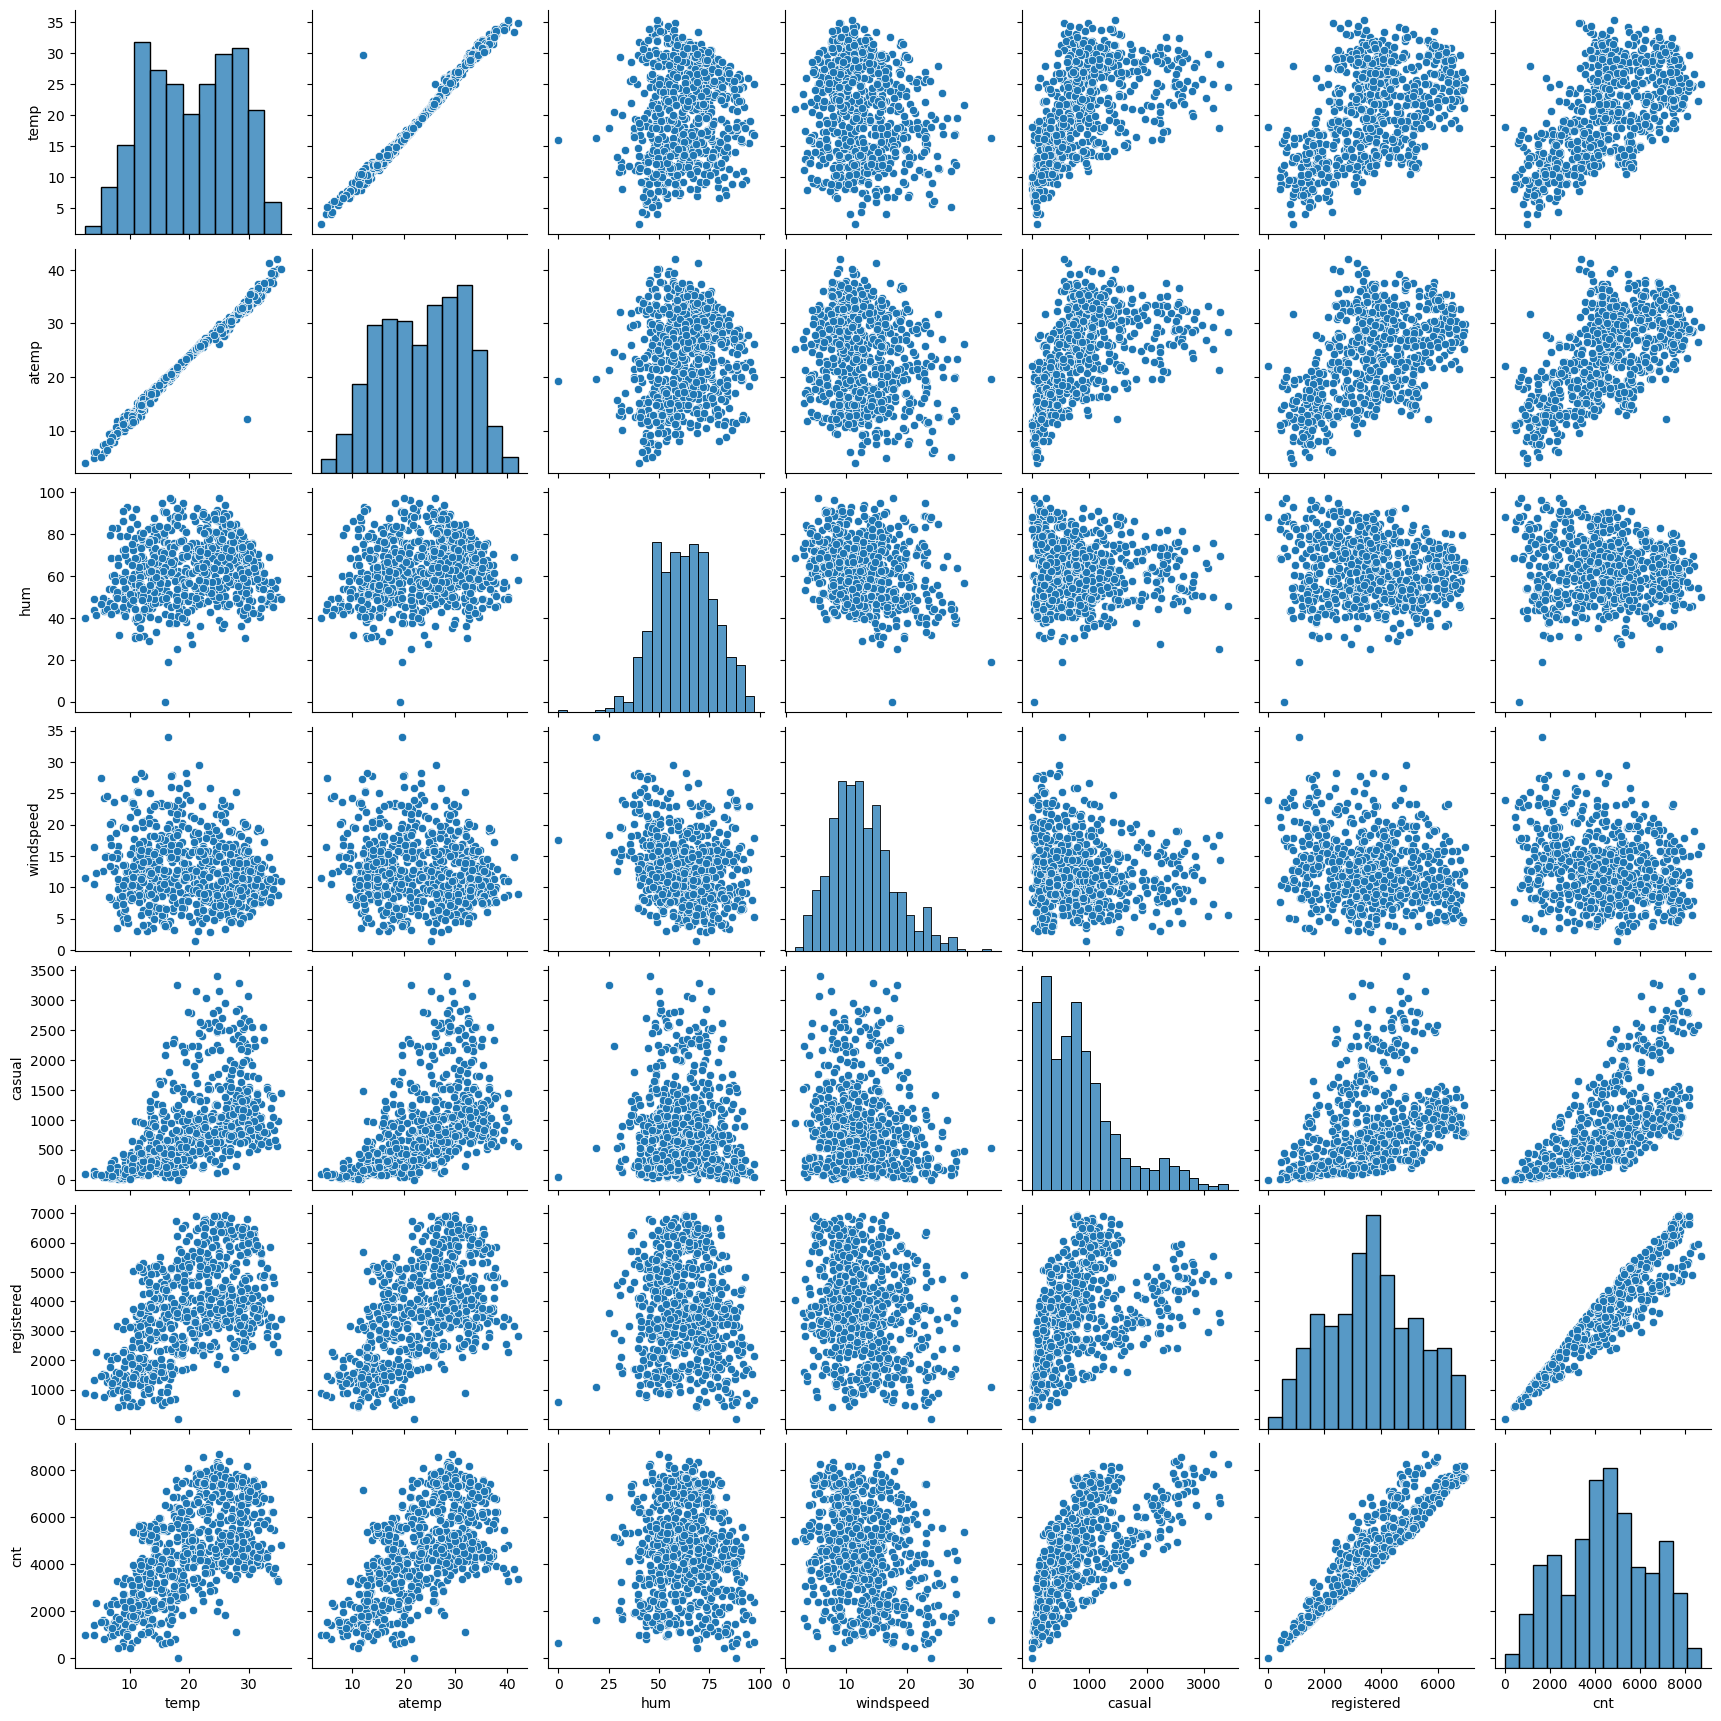

In [256]:
#Visualising numeric variables
sns.pairplot(bb)
plt.show()

C:\Users\sreeh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


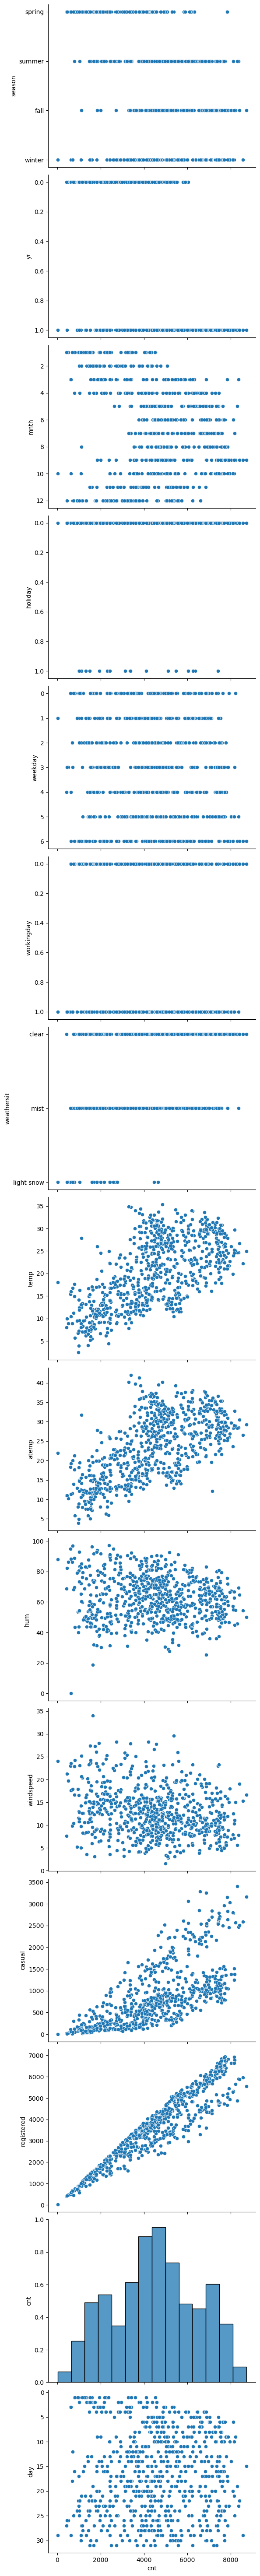

In [257]:
#Lets plot 'all vs cnt' to visualise any linearity between independent variables and cnt
pp = sns.pairplot(data=bb,
                  x_vars=['cnt'],
                  y_vars=boombikes,
                  height=4, aspect=6/4)

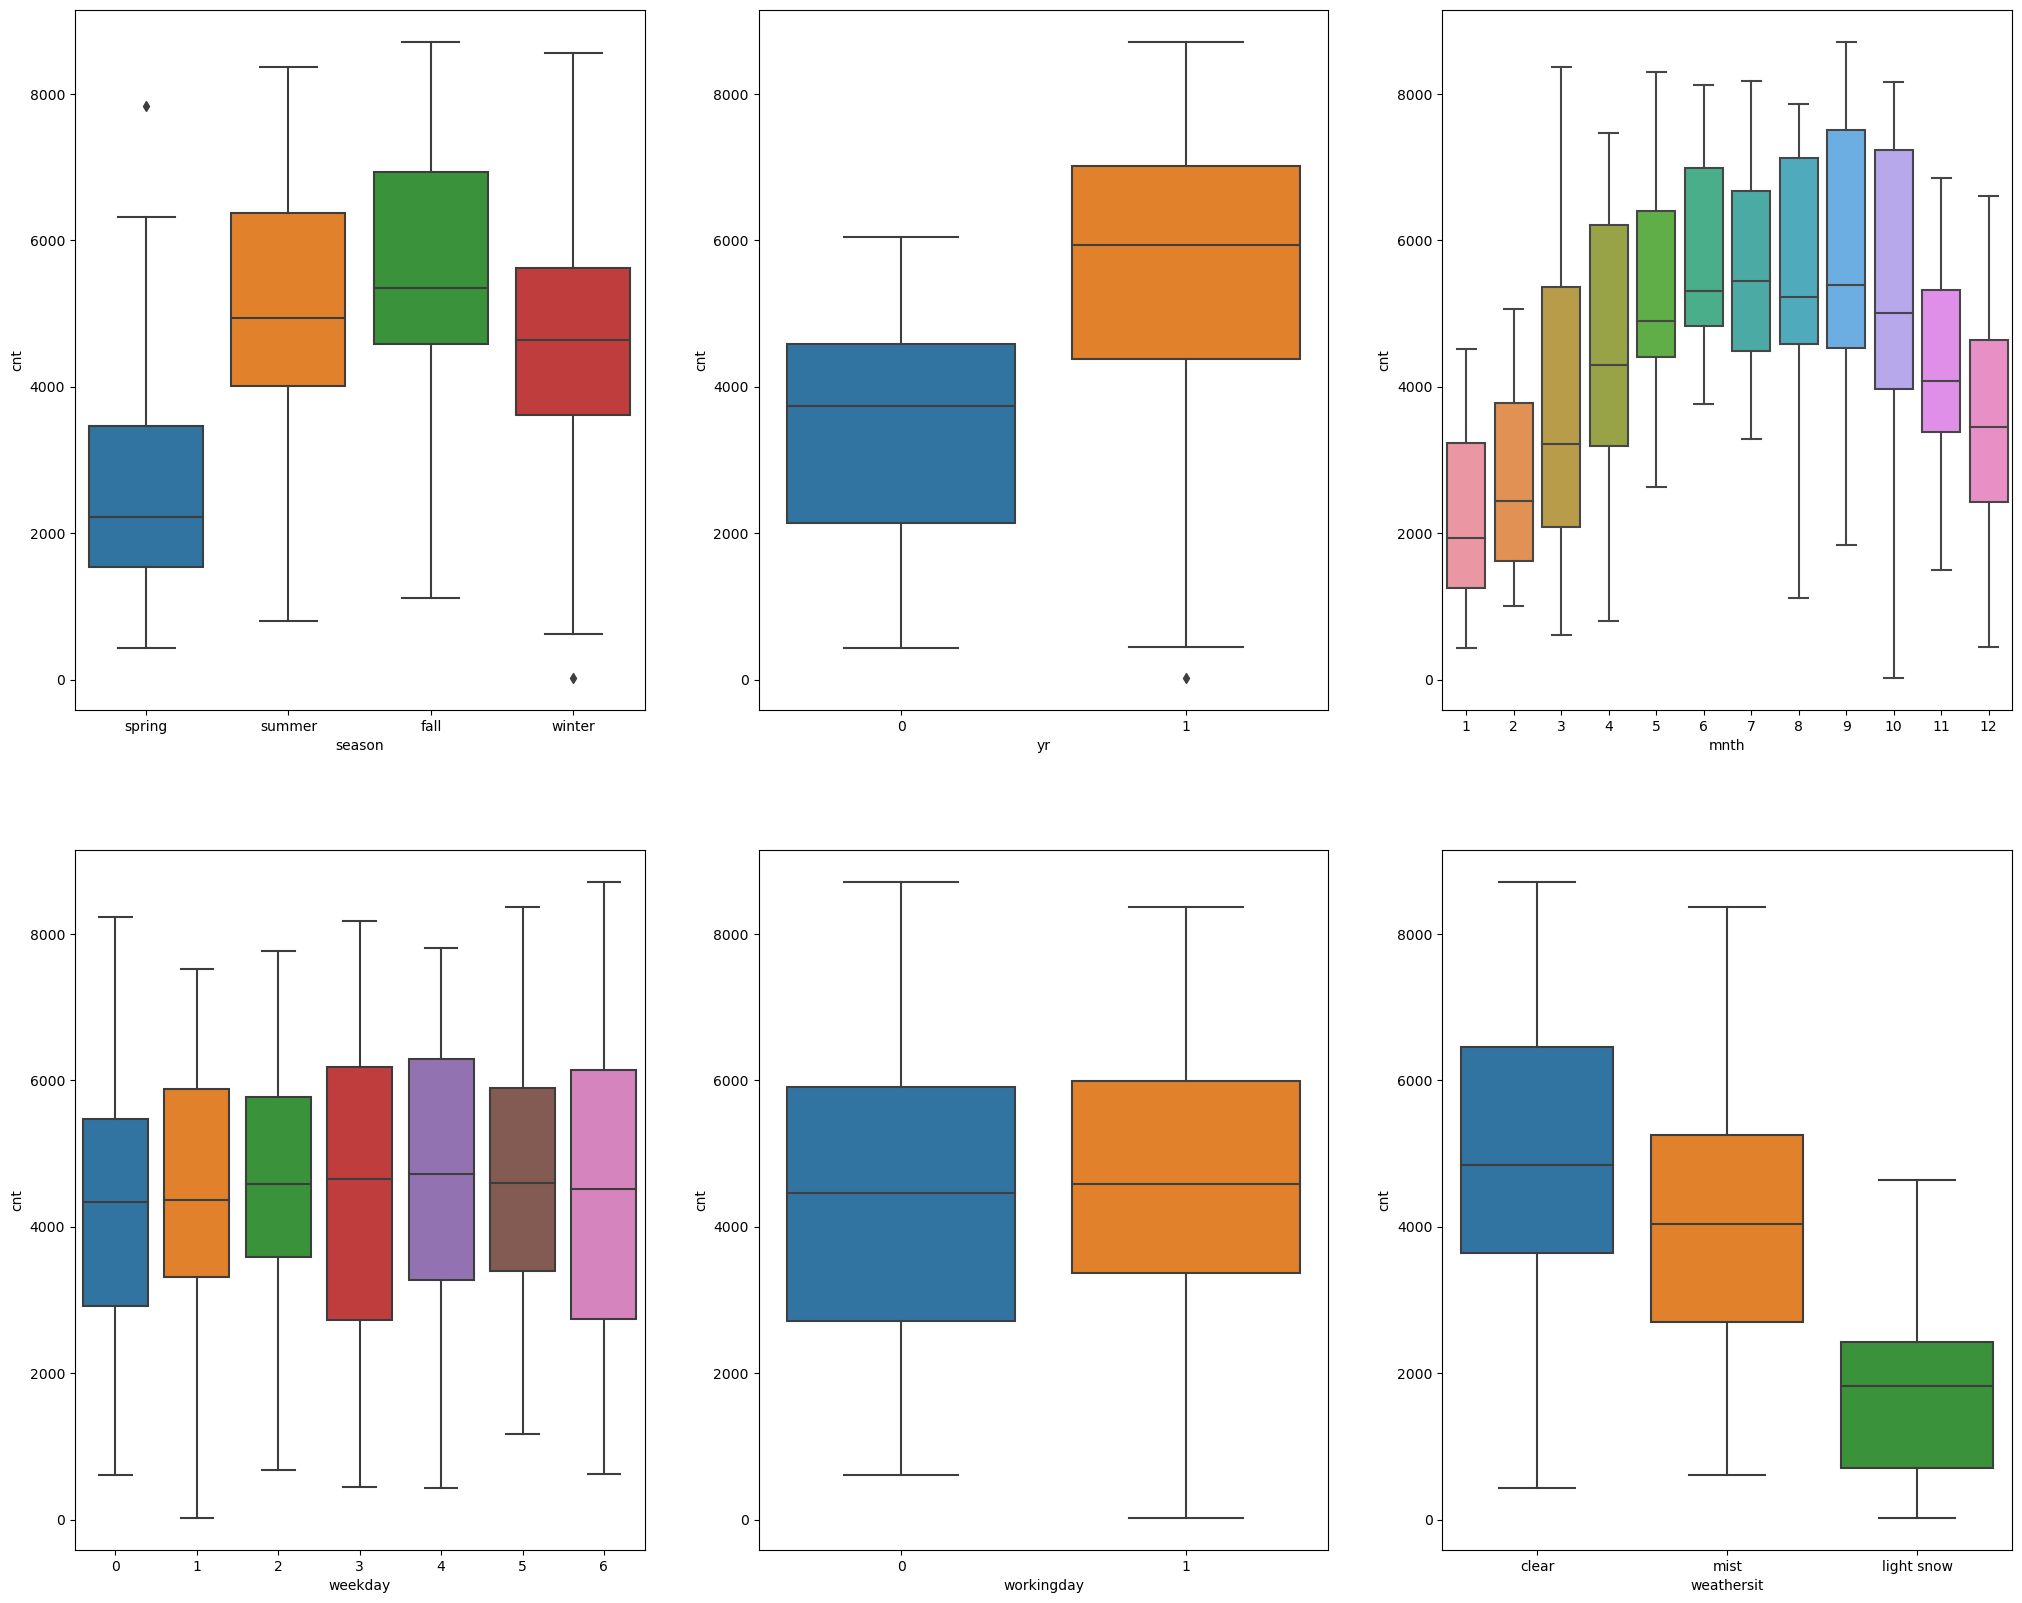

In [258]:
#Visualising catogorical variables individually first
plt.figure(figsize=(25,20))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt', data=bb)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt', data=bb)

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt', data=bb)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt', data=bb)
 
plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt', data=bb)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt', data=bb)

plt.show()


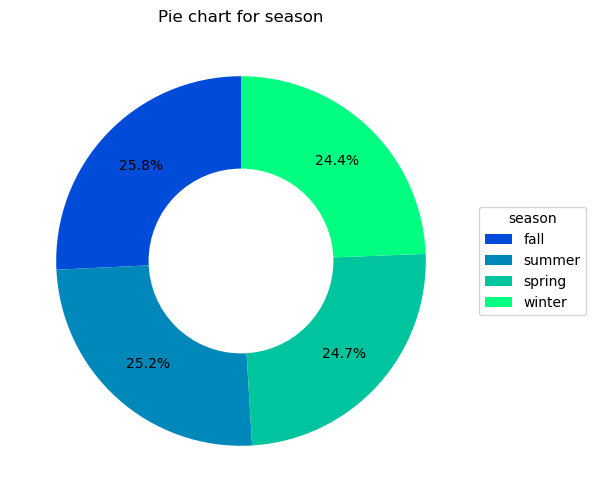

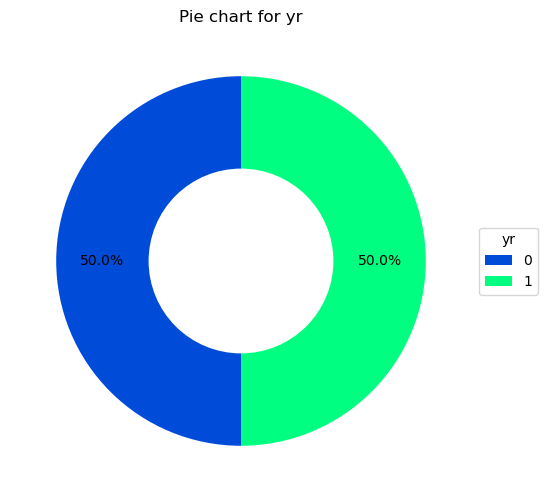

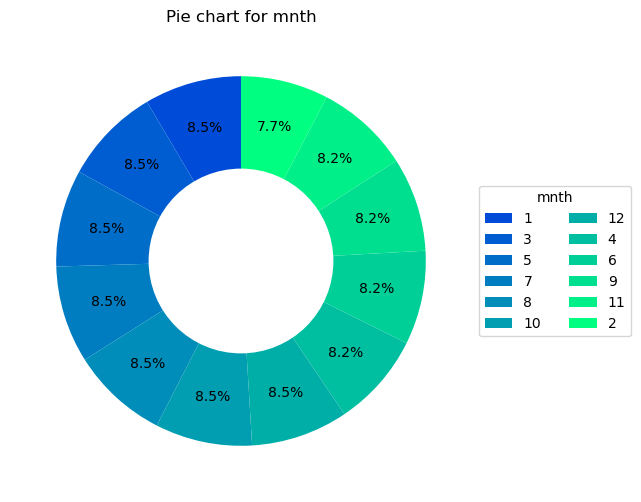

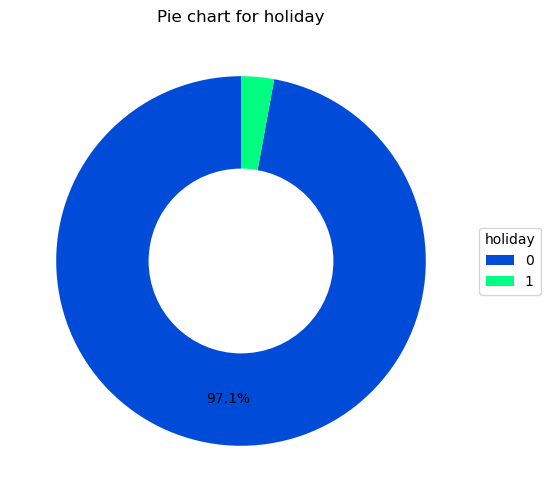

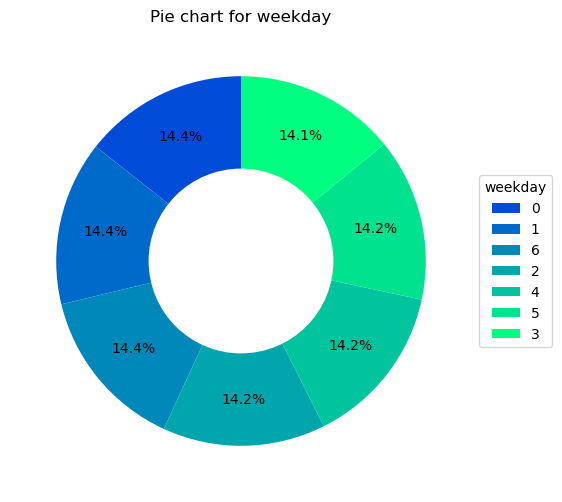

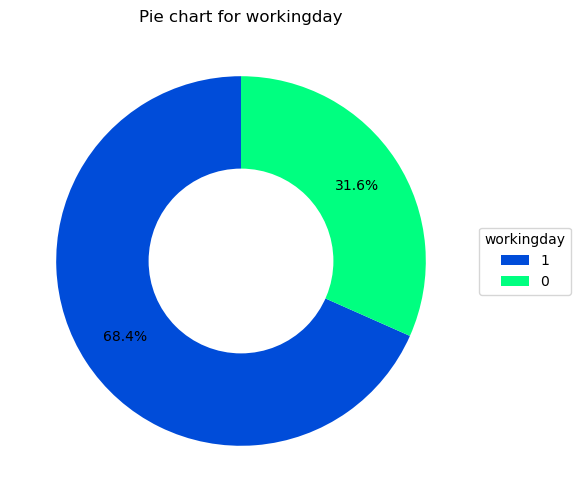

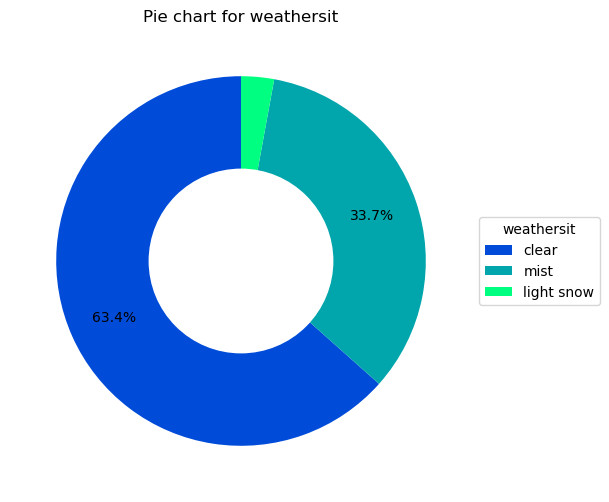

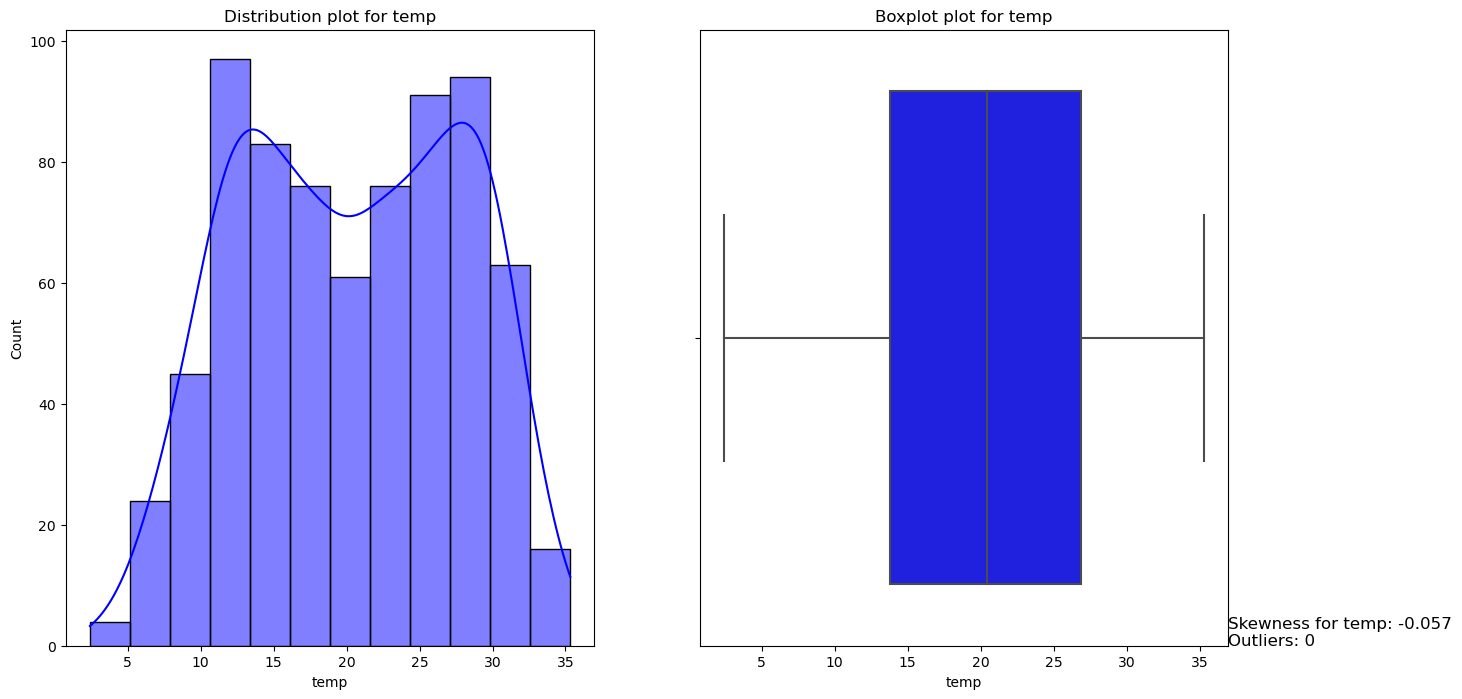

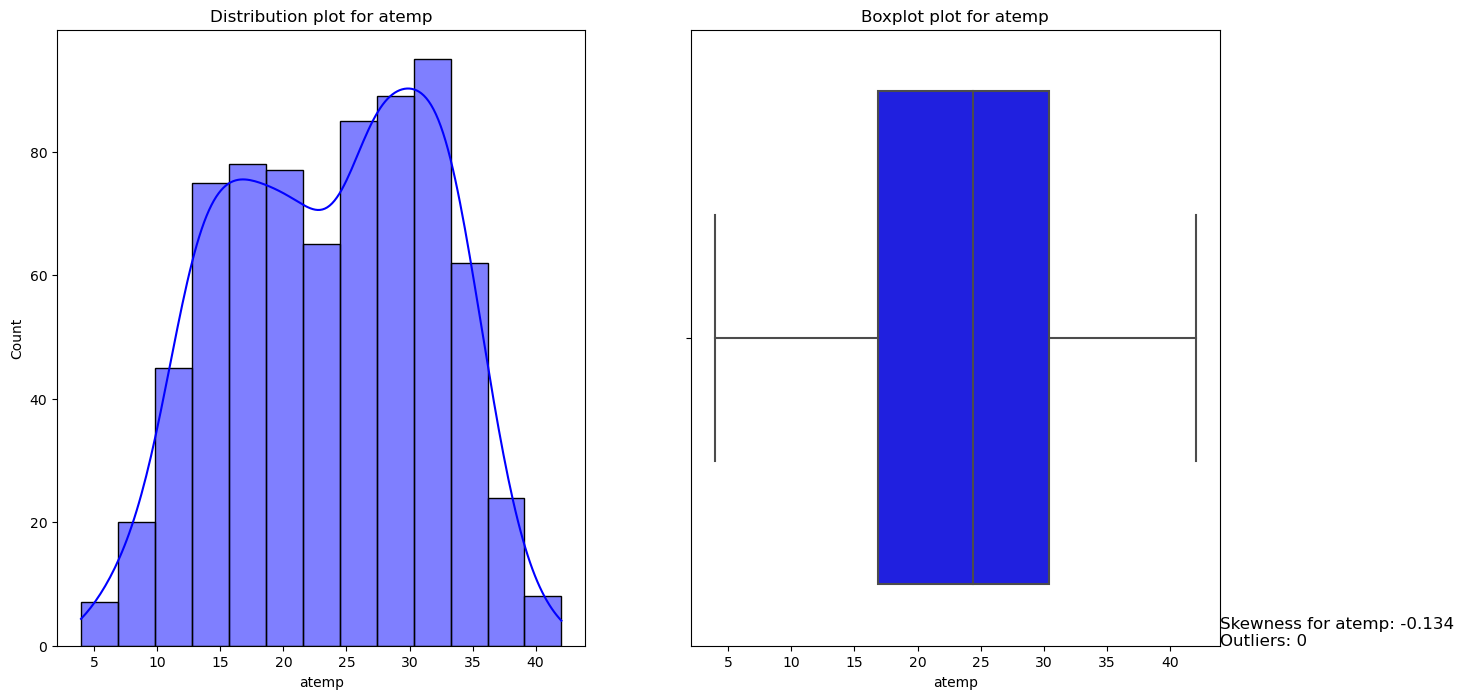

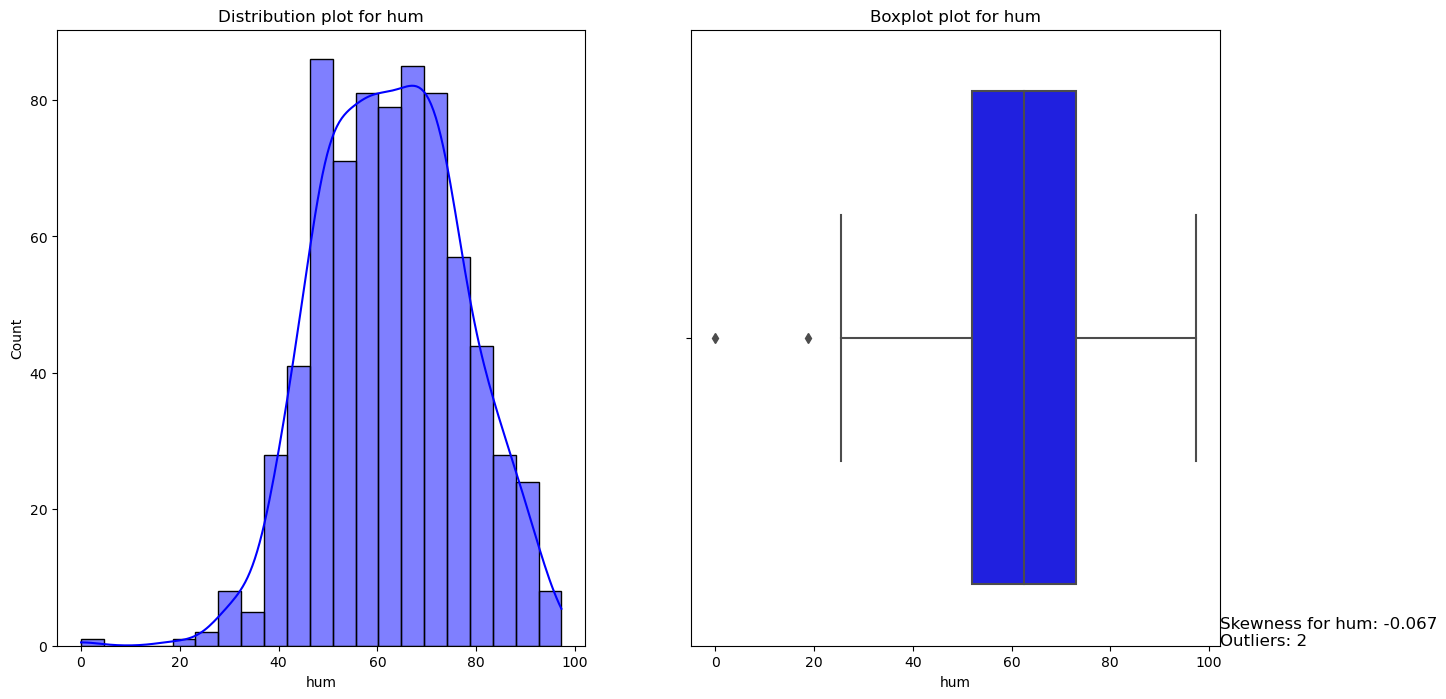

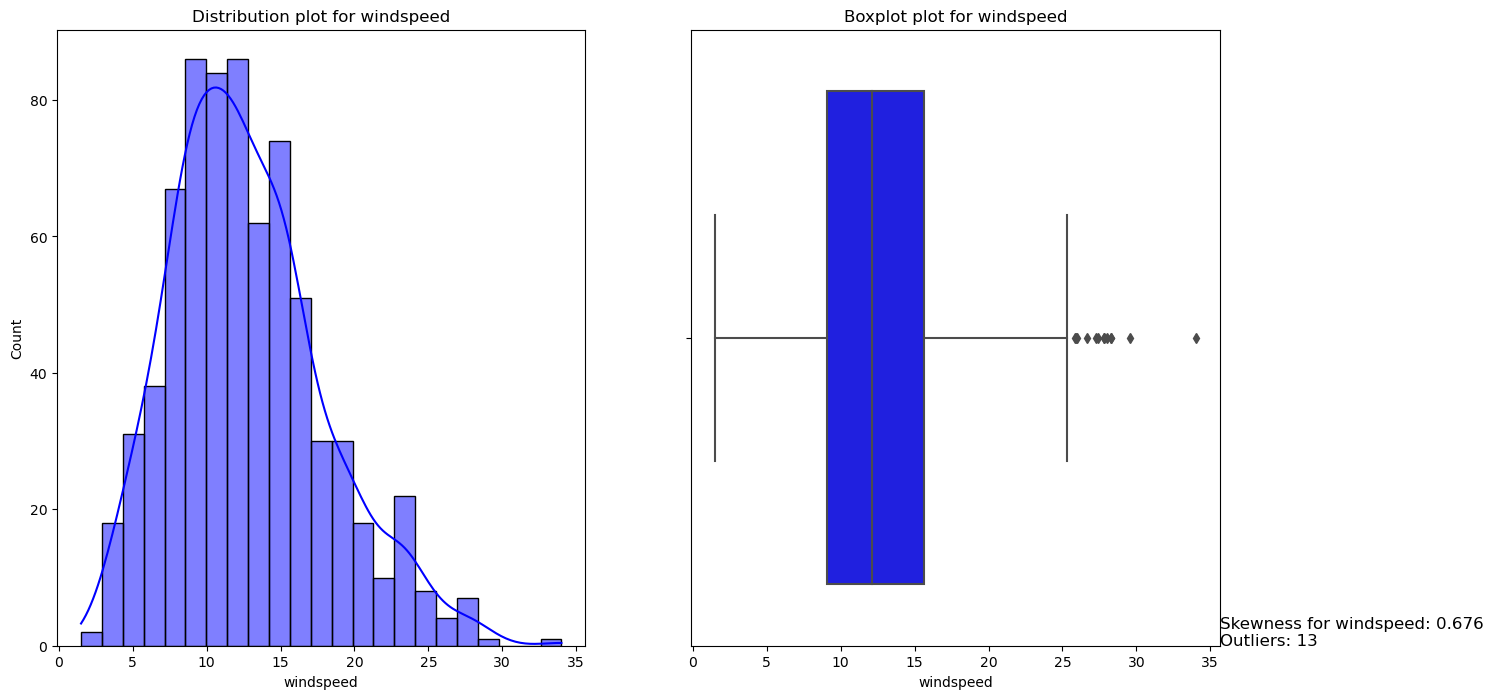

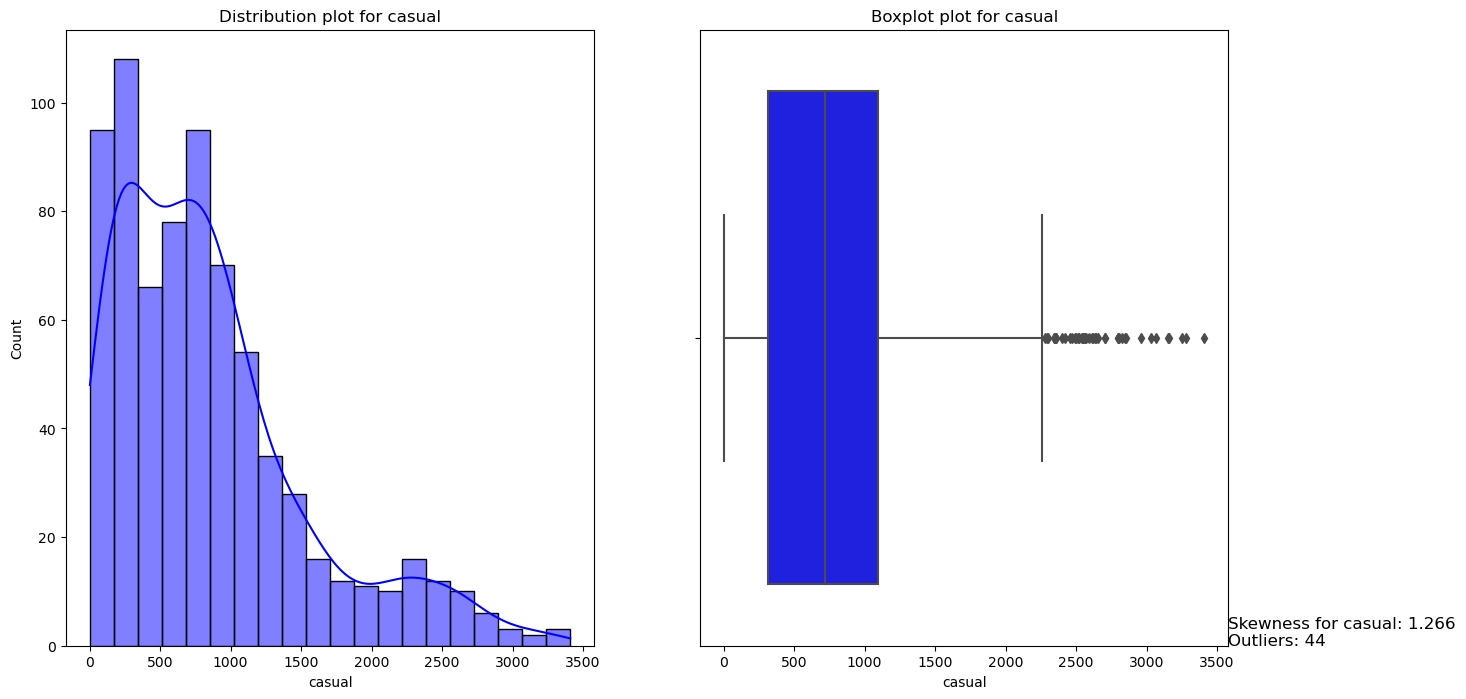

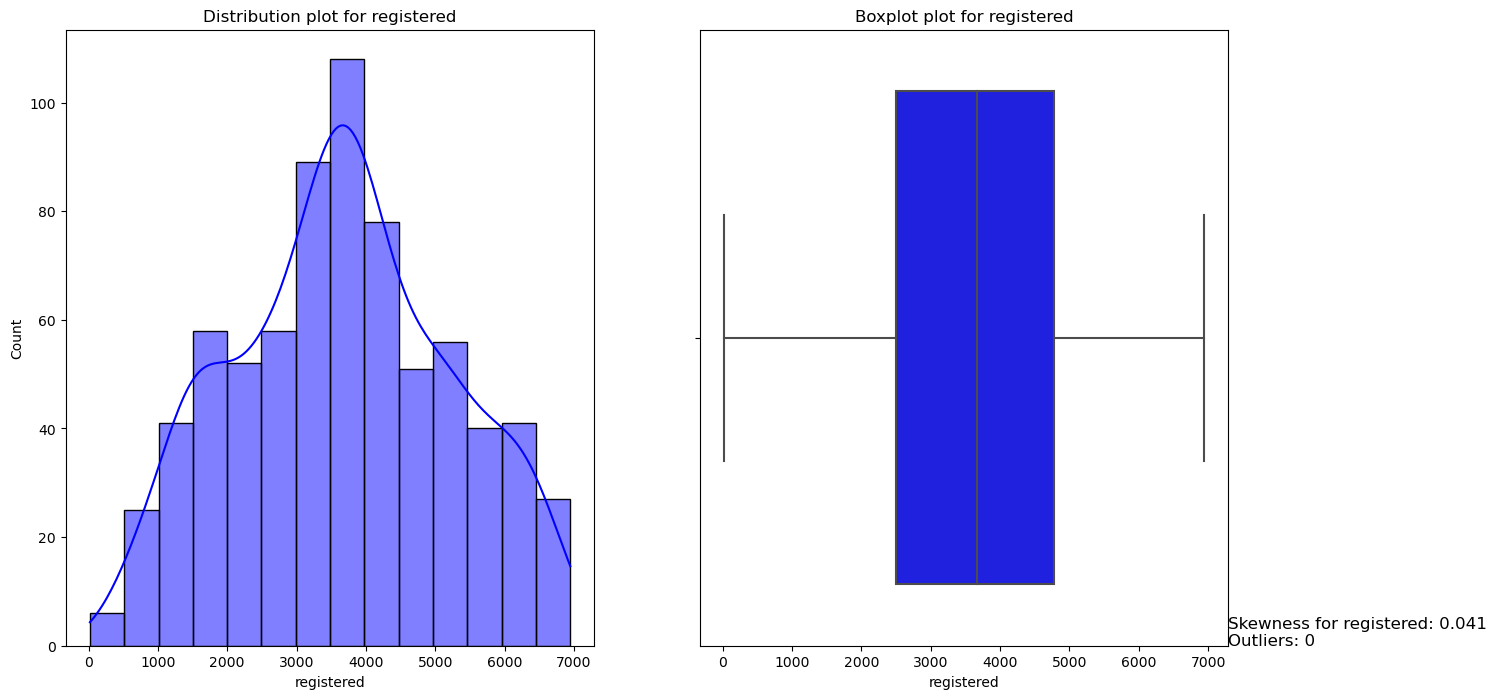

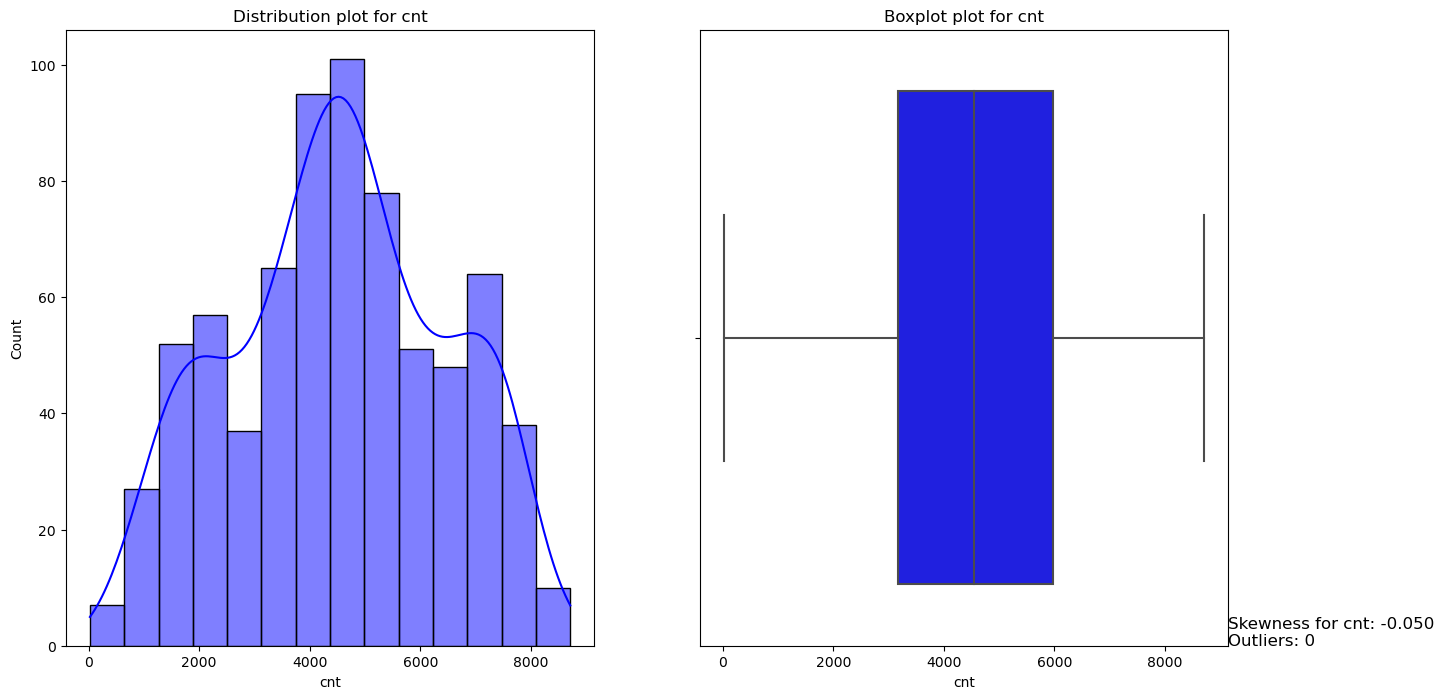

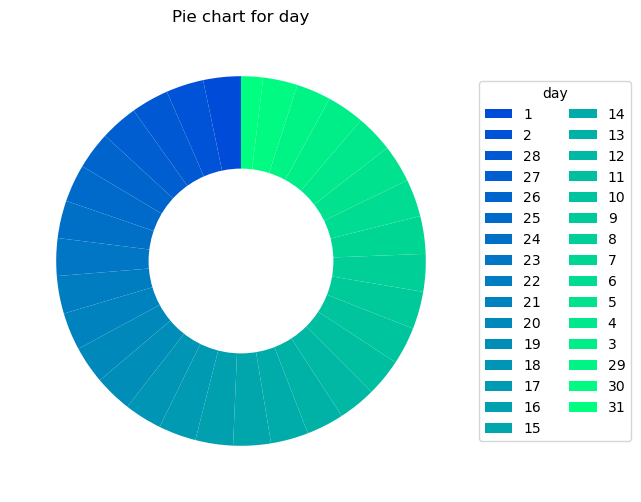

In [259]:
# Lets write Custom Function for plotting hist and box plots for further info
def plots(df):
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            
            # Plot histogram and box plots
            fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 8), sharex=True, sharey=False)
            sns.histplot(data=df, x=column, kde=True, ax=axes[0], color='b')
            axes[0].set_title(f'Distribution plot for {column}')
            sns.boxplot(data=df, x=column, ax=axes[1], color='b')
            axes[1].set_title(f'Boxplot plot for {column}')
            
            # Add skewness information
            textstr = f'Skewness for {column}: {df[column].skew():.3f}\n'
            
            # Perform outlier detection
            iqr = np.percentile(df[column], 75) - np.percentile(df[column], 25)
            cutoff = iqr * 1.5
            upper_bound = np.percentile(df[column], 75) + cutoff
            lower_bound = np.percentile(df[column], 25) - cutoff
            outliers = df[(df[column] > upper_bound) | (df[column] < lower_bound)]
            
            textstr += f'Outliers: {len(outliers)}'
            
            axes[1].text(1.0, 0.0, textstr, fontsize=12, transform=plt.gca().transAxes)
            
            plt.show()
            
        else: #If cat cols
            
            # Plot pie plots
            colormap = plt.cm.winter
            patches = df[column].nunique()
            color = [colormap(i) for i in np.linspace(0.3, 1, patches)]
            
            def pctf (pct, allvals):
                absolute = int(pct/100*np.sum(allvals))
                if pct < 4:
                    return ''
                else:
                    return '{:.1f}%'.format(pct)
            
            category_counts = df[column].value_counts()

            plt.figure(figsize=(10, 6))
            wedges, texts, autotext = plt.pie(category_counts, startangle=90, autopct=lambda pct: pctf(pct,category_counts), pctdistance=0.75, colors=color)
            plt.title(f'Pie chart for {column}')
            if len(category_counts) > 10:
                plt.legend(wedges, category_counts.index, title=column, ncols=2, loc='center left', bbox_to_anchor=(1,0,0.5,1))
            else:
                plt.legend(wedges, category_counts.index, title=column, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
            
            center_circle = plt.Circle((0,0),0.50,fc='white')
            plt.gca().add_artist(center_circle)
            
            plt.show()

plots(bb) # presence of skewness found in feature -- 'casual'

### Inference:
- Variable 'intsant' is just record index which by definition should not have any relation to 'cnt'
- The bivariate distribution (vs 'cnt') of 'dteday' is highly similar to 'instant'. This indicates that 'dteday' also wouldnt  have any correlation with 'cnt'. Probably we can drop these features once we confirm this using correlation matrix.


Conclusions:
------------------
- There are many numeric variables that exhibit linear relations with cnt
- We can go ahead to perform linear regression with this dataset

## Step 2: Preparing the Data for Modelling
- Dropping insignficant variables from domain understanding

- Converting categorical variables to dummy variables

### Lets Create dummy variables

In [260]:
season_dummy = pd.get_dummies(bb['season'], dtype='int', drop_first=True)
season_dummy.rename(columns={2:"summer", 3:"fall", 4:"winter"},inplace=True)
season_dummy.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [261]:
#Concat the new columns

bb = pd.concat([bb, season_dummy], axis=1)
bb = bb.drop('season', axis=1)
bb.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,summer,fall,winter
0,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0
1,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0
2,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0
3,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0
4,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0


In [262]:
# In weather we can take just 2 dummes bacause we found no values for 'Heavy rain'. Thus we are left with 3 values. hence n-1 = 3-1 =2
weather_dummy = pd.get_dummies(bb['weathersit'],dtype=int, drop_first = True)
weather_dummy.rename(columns={2:"mist", 3:"light_snow"},inplace=True)
weather_dummy.head()

,mist,light snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [263]:
#Concat the new columns

bb = pd.concat([bb, weather_dummy], axis=1)
bb = bb.drop('weathersit', axis=1)
bb.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,day,summer,fall,winter,mist,light snow
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0,0


In [264]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   yr          730 non-null    category
 1   mnth        730 non-null    category
 2   holiday     730 non-null    category
 3   weekday     730 non-null    category
 4   workingday  730 non-null    category
 5   temp        730 non-null    float64 
 6   atemp       730 non-null    float64 
 7   hum         730 non-null    float64 
 8   windspeed   730 non-null    float64 
 9   casual      730 non-null    int64   
 10  registered  730 non-null    int64   
 11  cnt         730 non-null    int64   
 12  day         730 non-null    category
 13  summer      730 non-null    int32   
 14  fall        730 non-null    int32   
 15  winter      730 non-null    int32   
 16  mist        730 non-null    int32   
 17  light snow  730 non-null    int32   
dtypes: category(6), float64(4), int32(5), int64(3)
mem

### Lets derived variables for the categorical variable month

In [265]:
#Lets convert mnth to 3 derived variables. 3 because (n-1)=(4-1)=3
bb["Quarter_JanFebMar"] = bb["mnth"].apply(lambda x: 1 if x<=3 else 0)
bb["Quarter_AprMayJun"] = bb["mnth"].apply(lambda x: 1 if 4<=x<=6 else 0)
bb["Quarter_JulAugSep"] = bb["mnth"].apply(lambda x: 1 if 7<=x<=9 else 0)

In [266]:
bb.drop(columns=["mnth"],axis=1,inplace =True)
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   yr                 730 non-null    category
 1   holiday            730 non-null    category
 2   weekday            730 non-null    category
 3   workingday         730 non-null    category
 4   temp               730 non-null    float64 
 5   atemp              730 non-null    float64 
 6   hum                730 non-null    float64 
 7   windspeed          730 non-null    float64 
 8   casual             730 non-null    int64   
 9   registered         730 non-null    int64   
 10  cnt                730 non-null    int64   
 11  day                730 non-null    category
 12  summer             730 non-null    int32   
 13  fall               730 non-null    int32   
 14  winter             730 non-null    int32   
 15  mist               730 non-null    int32   
 16  light sn

### Lets convert weekday and weekend into one dummy column

In [267]:
bb["weekend"] = bb["weekday"].apply(lambda x: 0 if 1<=x<=5 else 1)
bb.drop(columns=["weekday"],axis=1,inplace =True)
bb.drop(columns=["workingday"],axis=1,inplace =True)
bb.head()

,yr,holiday,temp,atemp,hum,windspeed,casual,registered,cnt,day,summer,fall,winter,mist,light snow,Quarter_JanFebMar,Quarter_AprMayJun,Quarter_JulAugSep,weekend
0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1,0,1,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1,0,1,0,0,1
2,0,0,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0,0,1,0,0,0
3,0,0,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0,0,1,0,0,0
4,0,0,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0,0,1,0,0,0


In [268]:
#Now lets see all columns we are left with
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   yr                 730 non-null    category
 1   holiday            730 non-null    category
 2   temp               730 non-null    float64 
 3   atemp              730 non-null    float64 
 4   hum                730 non-null    float64 
 5   windspeed          730 non-null    float64 
 6   casual             730 non-null    int64   
 7   registered         730 non-null    int64   
 8   cnt                730 non-null    int64   
 9   day                730 non-null    category
 10  summer             730 non-null    int32   
 11  fall               730 non-null    int32   
 12  winter             730 non-null    int32   
 13  mist               730 non-null    int32   
 14  light snow         730 non-null    int32   
 15  Quarter_JanFebMar  730 non-null    int64   
 16  Quarter_

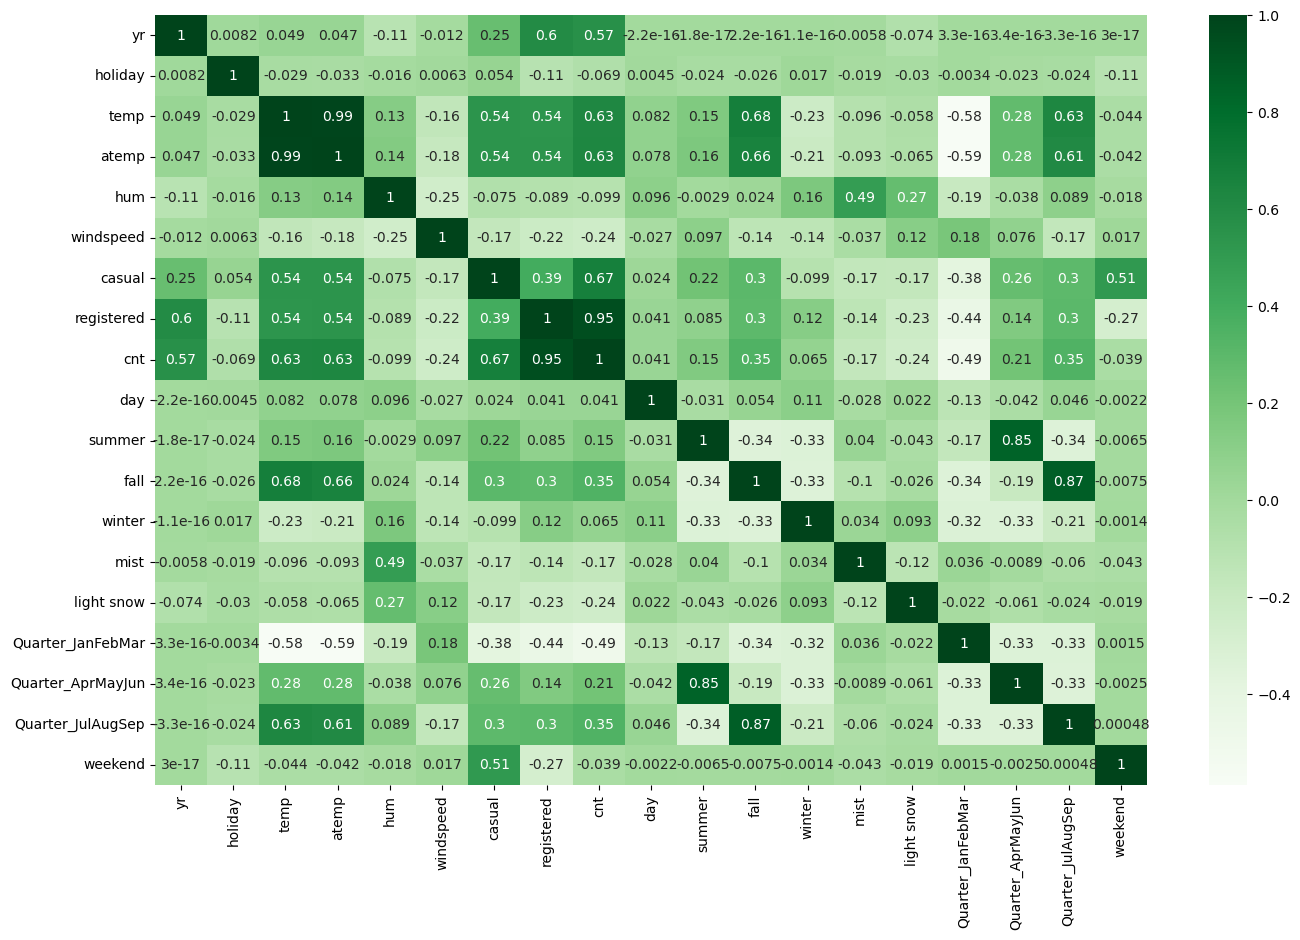

In [269]:
#Plotting correlation heatmap to analyze the linearity between the variables 
plt.figure(figsize = (16, 10))
sns.heatmap(bb.corr(), annot = True, cmap="Greens")
plt.show()

In [270]:
#Temp and Atemp are highly correlated. We can remove either one of them
# Lets drop Temp because Atemp denoted feeling temperature and that can have more meanigful effect on cnt

bb.drop(columns=["temp"],axis=1,inplace =True)
bb.head()

,yr,holiday,atemp,hum,windspeed,casual,registered,cnt,day,summer,fall,winter,mist,light snow,Quarter_JanFebMar,Quarter_AprMayJun,Quarter_JulAugSep,weekend
0,0,0,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1,0,1,0,0,1
1,0,0,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1,0,1,0,0,1
2,0,0,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0,0,1,0,0,0
3,0,0,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0,0,1,0,0,0
4,0,0,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0,0,1,0,0,0


In [271]:
# Also 'registered' is highly correlated with 'cnt'. This will effect our predictions. Hence lets drop
bb.drop(columns=["registered"],axis=1,inplace =True)
bb.head()

,yr,holiday,atemp,hum,windspeed,casual,cnt,day,summer,fall,winter,mist,light snow,Quarter_JanFebMar,Quarter_AprMayJun,Quarter_JulAugSep,weekend
0,0,0,18.18125,80.5833,10.749882,331,985,1,0,0,0,1,0,1,0,0,1
1,0,0,17.68695,69.6087,16.652113,131,801,1,0,0,0,1,0,1,0,0,1
2,0,0,9.47025,43.7273,16.636703,120,1349,1,0,0,0,0,0,1,0,0,0
3,0,0,10.60610,59.0435,10.739832,108,1562,1,0,0,0,0,0,1,0,0,0
4,0,0,11.46350,43.6957,12.522300,82,1600,1,0,0,0,0,0,1,0,0,0


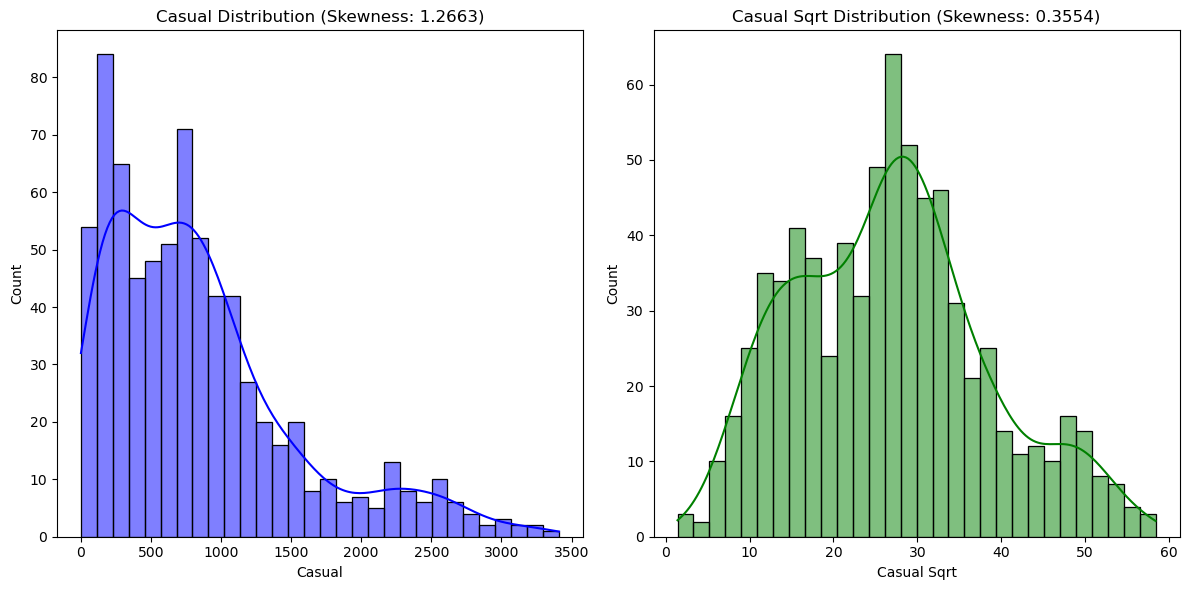

In [272]:
# Lets analyse 'casual' variable in more detail
# Check the skewness of the 'casual' 
before_skewness = bb['casual'].skew()

# Apply square root transformation to address skewness
bb['casual_sqrt'] = FunctionTransformer(np.sqrt).fit_transform(bb[['casual']])

# Check the skewness of the transformed variable
after_skewness = bb['casual_sqrt'].skew()

# Plot histograms for 'casual' before and after transformation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(bb['casual'], bins=30, kde=True, color='blue')
plt.title(f'Casual Distribution (Skewness: {before_skewness:.4f})')
plt.xlabel('Casual')

plt.subplot(1, 2, 2)
sns.histplot(bb['casual_sqrt'], bins=30, kde=True, color='green')
plt.title(f'Casual Sqrt Distribution (Skewness: {after_skewness:.4f})')
plt.xlabel('Casual Sqrt')

plt.tight_layout()
plt.show()

In [273]:
#Lets add this transformed casual sqrt column and drop casual
bb = bb.drop('casual', axis=1)

### Spliting the Dataset

In [274]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bb_train, bb_test = train_test_split(bb, train_size = 0.7, test_size = 0.3, random_state = 100)

In [275]:
bb_train.head()

,yr,holiday,atemp,hum,windspeed,cnt,day,summer,fall,winter,mist,light snow,Quarter_JanFebMar,Quarter_AprMayJun,Quarter_JulAugSep,weekend,casual_sqrt
653,1,0,23.0423,55.8333,12.208807,7534,16,0,0,1,0,0,0,0,0,0,30.364453
576,1,0,33.1448,70.4167,11.083475,7216,31,0,1,0,0,0,0,0,1,0,31.112698
426,1,0,20.6746,62.1250,10.792293,4066,3,0,0,0,1,0,1,0,0,1,30.919250
728,1,0,11.5850,48.3333,23.500518,1796,30,0,0,0,0,0,0,0,0,1,19.078784
482,1,0,18.8752,48.9583,8.708325,4220,28,1,0,0,1,0,0,1,0,1,33.466401


### Lets scale the data to achive optimum beta co-efficients

In [276]:
#assigning variable to scaler
scaler = MinMaxScaler()
# Applying scaler to all the columns except the derived and 'dummy' variables that are already in 0 & 1.

numeric_var = ['atemp','hum','windspeed','cnt','day','casual_sqrt']
bb_train[numeric_var] = scaler.fit_transform(bb_train[numeric_var])

# Analysing the train dataframe after scaling
bb_train.head()

,yr,holiday,atemp,hum,windspeed,cnt,day,summer,fall,winter,mist,light snow,Quarter_JanFebMar,Quarter_AprMayJun,Quarter_JulAugSep,weekend,casual_sqrt
653,1,0,0.501133,0.575354,0.300794,0.864243,0.500000,0,0,1,0,0,0,0,0,0,0.518049
576,1,0,0.766351,0.725633,0.264686,0.827658,1.000000,0,1,0,0,0,0,0,1,0,0.531438
426,1,0,0.438975,0.640189,0.255342,0.465255,0.066667,0,0,0,1,0,1,0,0,1,0.527976
728,1,0,0.200348,0.498067,0.663106,0.204096,0.966667,0,0,0,0,0,0,0,0,1,0.316098
482,1,0,0.391735,0.504508,0.188475,0.482973,0.900000,1,0,0,1,0,0,1,0,1,0.573556


### Lets split the dataset to x_train and y_train

In [277]:
y_train = bb_train.pop('cnt')
X_train = bb_train

print (y_train.head())
print (X_train.head())

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64
    yr holiday     atemp       hum  windspeed       day  summer  fall  winter  \
653  1       0  0.501133  0.575354   0.300794  0.500000       0     0       1   
576  1       0  0.766351  0.725633   0.264686  1.000000       0     1       0   
426  1       0  0.438975  0.640189   0.255342  0.066667       0     0       0   
728  1       0  0.200348  0.498067   0.663106  0.966667       0     0       0   
482  1       0  0.391735  0.504508   0.188475  0.900000       1     0       0   

     mist  light snow  Quarter_JanFebMar  Quarter_AprMayJun  \
653     0           0                  0                  0   
576     0           0                  0                  0   
426     1           0                  1                  0   
728     0           0                  0                  0   
482     1           0                  0                  1   

     Quarter_JulAugSep  week

## Step 3: Training The Model 

In [278]:
# Performing RFE and LinearRegression

# Running RFE with the output number of the variable equal to 12
lm_1 = LinearRegression()
lm_1.fit(X_train, y_train)

# Specify the number of features to select 
num_features_to_select = 12

# Create RFE model and select features
rfe = RFE(lm_1, n_features_to_select=num_features_to_select, step=1)
X_train_rfe = rfe.fit_transform(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))





[('yr', True, 1),
 ('holiday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('day', False, 4),
 ('summer', False, 5),
 ('fall', False, 3),
 ('winter', True, 1),
 ('mist', True, 1),
 ('light snow', True, 1),
 ('Quarter_JanFebMar', False, 2),
 ('Quarter_AprMayJun', True, 1),
 ('Quarter_JulAugSep', True, 1),
 ('weekend', True, 1),
 ('casual_sqrt', True, 1)]

In [279]:
# Creating X_test dataframe with RFE selected variables
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

In [280]:
X_train_rfe.head()

,yr,holiday,atemp,hum,windspeed,winter,mist,light snow,Quarter_AprMayJun,Quarter_JulAugSep,weekend,casual_sqrt
653,1,0,0.501133,0.575354,0.300794,1,0,0,0,0,0,0.518049
576,1,0,0.766351,0.725633,0.264686,0,0,0,0,1,0,0.531438
426,1,0,0.438975,0.640189,0.255342,0,1,0,0,0,1,0.527976
728,1,0,0.200348,0.498067,0.663106,0,0,0,0,0,1,0.316098
482,1,0,0.391735,0.504508,0.188475,0,1,0,1,0,1,0.573556


### Using statsmodel, for the detailed statistics

In [281]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)

In [282]:
lm_2 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [283]:
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     487.8
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          6.24e-266
Time:                        23:40:31   Log-Likelihood:                 688.17
No. Observations:                 510   AIC:                            -1350.
Df Residuals:                     497   BIC:                            -1295.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1191      0.02

In [284]:
# Lets Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,48.50
3,atemp,4.63
12,casual_sqrt,4.54
10,Quarter_JulAugSep,3.55
9,Quarter_AprMayJun,2.60
11,weekend,2.16
4,hum,1.90
7,mist,1.59
6,winter,1.54
8,light snow,1.32


#### We are having very high VIF for const variable. This could be because of other derived variables like casual_sqrt. Lets edit this columsn and see how the scores change

In [285]:
X_train_rfe.head()

,const,yr,holiday,atemp,hum,windspeed,winter,mist,light snow,Quarter_AprMayJun,Quarter_JulAugSep,weekend,casual_sqrt
653,1.0,1,0,0.501133,0.575354,0.300794,1,0,0,0,0,0,0.518049
576,1.0,1,0,0.766351,0.725633,0.264686,0,0,0,0,1,0,0.531438
426,1.0,1,0,0.438975,0.640189,0.255342,0,1,0,0,0,1,0.527976
728,1.0,1,0,0.200348,0.498067,0.663106,0,0,0,0,0,1,0.316098
482,1.0,1,0,0.391735,0.504508,0.188475,0,1,0,1,0,1,0.573556


In [286]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe_edit = X_train_rfe.drop('casual_sqrt', axis=1)
X_train_rfe_edit = X_train_rfe_edit.drop('atemp', axis=1)
X_train_rfe_edit = X_train_rfe_edit.drop('const', axis=1)
X_train_rfe_edit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   yr                 510 non-null    category
 1   holiday            510 non-null    category
 2   hum                510 non-null    float64 
 3   windspeed          510 non-null    float64 
 4   winter             510 non-null    int32   
 5   mist               510 non-null    int32   
 6   light snow         510 non-null    int32   
 7   Quarter_AprMayJun  510 non-null    int64   
 8   Quarter_JulAugSep  510 non-null    int64   
 9   weekend            510 non-null    int64   
dtypes: category(2), float64(2), int32(3), int64(3)
memory usage: 31.1 KB


In [287]:
# Build a third fitted model
X_train_rfe_edit = sm.add_constant(X_train_rfe_edit)
lm_3 = sm.OLS(y_train, X_train_rfe_edit).fit()

In [288]:
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     153.6
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.66e-145
Time:                        23:40:38   Log-Likelihood:                 396.96
No. Observations:                 510   AIC:                            -771.9
Df Residuals:                     499   BIC:                            -725.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3241      0.03

In [289]:
vif = pd.DataFrame()
X = X_train_rfe_edit
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,43.43
3,hum,1.77
6,mist,1.49
9,Quarter_JulAugSep,1.44
8,Quarter_AprMayJun,1.42
5,winter,1.41
7,light snow,1.23
4,windspeed,1.19
1,yr,1.02
2,holiday,1.02


### lets repeat the step to further remove 'hum' variable 


In [290]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe_edit = X_train_rfe_edit.drop('hum', axis=1)
X_train_rfe_edit = X_train_rfe_edit.drop('const', axis=1)
X_train_rfe_edit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   yr                 510 non-null    category
 1   holiday            510 non-null    category
 2   windspeed          510 non-null    float64 
 3   winter             510 non-null    int32   
 4   mist               510 non-null    int32   
 5   light snow         510 non-null    int32   
 6   Quarter_AprMayJun  510 non-null    int64   
 7   Quarter_JulAugSep  510 non-null    int64   
 8   weekend            510 non-null    int64   
dtypes: category(2), float64(1), int32(3), int64(3)
memory usage: 27.1 KB


In [291]:
# Build fitted model
X_train_rfe_edit = sm.add_constant(X_train_rfe_edit)
lm_3 = sm.OLS(y_train, X_train_rfe_edit).fit()

In [292]:
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     171.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.02e-146
Time:                        23:40:43   Log-Likelihood:                 396.93
No. Observations:                 510   AIC:                            -773.9
Df Residuals:                     500   BIC:                            -731.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3177      0.01

## Step 4: Residual Analysis of the train data

In [293]:
#Now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.
y_train_pr = lm_3.predict(X_train_rfe_edit)

C:\Users\sreeh\AppData\Local\Temp\ipykernel_18000\3721264048.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pr), bins = 20)


Text(0.5, 0, 'Errors')

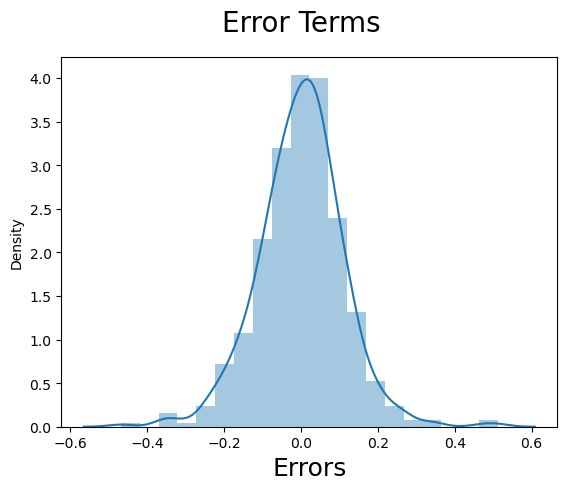

In [294]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pr), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X

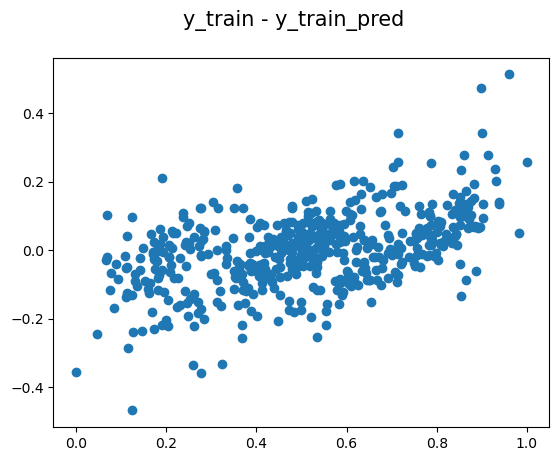

In [295]:
fig = plt.figure()
plt.scatter(y_train,(y_train - y_train_pr))
fig.suptitle('y_train - y_train_pred', fontsize = 15) 
plt.show()

## Validating assumptions for linear regression model:
### - Guassian Distribution centered around mean 0
### - No definite pattern found

## Step 5:  Making Predictions on Test Set

In [296]:
bb_test.head()

,yr,holiday,atemp,hum,windspeed,cnt,day,summer,fall,winter,mist,light snow,Quarter_JanFebMar,Quarter_AprMayJun,Quarter_JulAugSep,weekend,casual_sqrt
184,0,1,33.27085,63.7917,5.459106,6043,7,0,1,0,1,0,0,0,1,0,55.362442
535,1,0,36.04875,59.2083,7.625404,6211,20,1,0,0,0,0,0,1,0,0,29.529646
299,0,0,22.85230,81.2917,13.250121,2659,27,0,0,1,1,0,0,0,0,0,15.491933
221,0,0,34.24915,42.4167,13.417286,4780,8,0,1,0,0,0,0,0,1,0,29.732137
152,0,0,32.19710,30.5000,19.583229,4968,6,1,0,0,0,0,0,1,0,0,27.129320


In [297]:
#Applying the scaling on the test sets
num_var = ['atemp','hum','windspeed','cnt','day','casual_sqrt']
bb_test[num_var] = scaler.transform(bb_test[num_var])

bb_test.describe()

,atemp,hum,windspeed,cnt,day,summer,fall,winter,mist,light snow,Quarter_JanFebMar,Quarter_AprMayJun,Quarter_JulAugSep,weekend,casual_sqrt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.532991,0.638508,0.313350,0.520592,0.497565,0.264840,0.246575,0.232877,0.319635,0.027397,0.232877,0.273973,0.251142,0.264840,0.461281
std,0.217888,0.148974,0.159947,0.218435,0.290688,0.442259,0.432005,0.423633,0.467403,0.163612,0.423633,0.447017,0.434663,0.442259,0.209590
min,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028377
25%,0.344751,0.527265,0.198517,0.377531,0.266667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.302944
50%,0.549198,0.627737,0.299459,0.524275,0.466667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.460158
75%,0.714132,0.743928,0.403048,0.672745,0.766667,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.500000,1.000000,0.591987
max,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.019643


In [298]:
# Deviding X and y
y_test = bb_test.pop('cnt')
X_test = bb_test

In [299]:
# Adding constant variable to test dataframe
X_test_lm3 = sm.add_constant(X_test)

# Updating X_test_lr5 dataframe by dropping the variables as analyzed from the above models
X_test_lm3 =X_test_lm3.drop(["atemp", "hum","day","summer", "fall", "Quarter_JanFebMar", "casual_sqrt"], axis = 1)
X_test_lm3.head()

,const,yr,holiday,windspeed,winter,mist,light snow,Quarter_AprMayJun,Quarter_JulAugSep,weekend
184,1.0,0,1,0.084219,0,1,0,0,1,0
535,1.0,1,0,0.153728,0,0,0,1,0,0
299,1.0,0,0,0.334206,1,1,0,0,0,0
221,1.0,0,0,0.339570,0,0,0,0,1,0
152,1.0,0,0,0.537414,0,0,0,1,0,0


In [300]:
# Making predictions using the fifth model
y_pred = lm_3.predict(X_test_lm3)

Text(0, 0.5, 'y_pred')

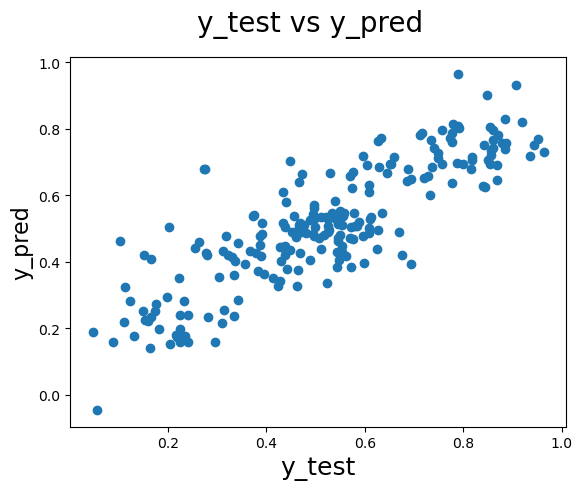

In [301]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                          

plt.ylabel('y_pred', fontsize = 16)

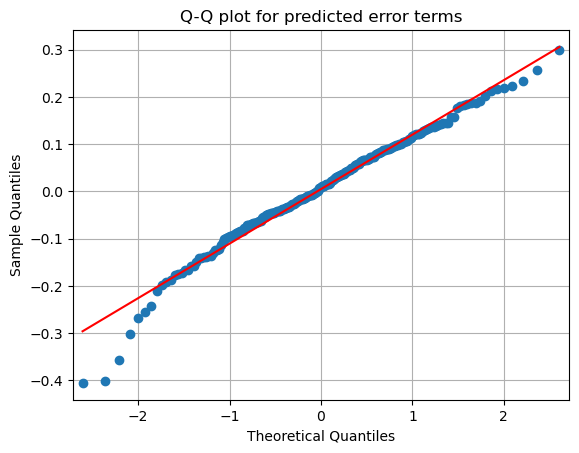

In [302]:
residuals = y_test - y_pred

sm.qqplot(residuals, line='s')
plt.title('Q-Q plot for predicted error terms')
plt.grid(True)
plt.show()

In [303]:
#checking final mean squared error

mse = mean_squared_error(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)

#Checking final R2 score

r2_score(y_test, y_pred)

Mean_Squared_Error : 0.013341220592995253


0.7191074094206005

# Final Result: 
    - MSE = 0.0133
    - R2 =  0.7191